In [8]:
#sentiment analysis

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [9]:
df = pd.read_csv('tweets.csv', encoding='ISO-8859-1')
print(df.shape)


(1048575, 6)


In [10]:
df.head()

,target,id,date,flaf,user,texts
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048575 non-null  int64 
 1   id      1048575 non-null  int64 
 2   date    1048575 non-null  object
 3   flaf    1048575 non-null  object
 4   user    1048575 non-null  object
 5   texts   1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [12]:
df.isnull().sum()

target    0
id        0
date      0
flaf      0
user      0
texts     0
dtype: int64

In [20]:
print(df.columns)
print(df['texts'].head())



Index(['target', 'id', 'date', 'flaf', 'user', 'texts'], dtype='object')
0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: texts, dtype: object


In [21]:
df.columns

Index(['target', 'id', 'date', 'flaf', 'user', 'texts'], dtype='object')

In [22]:
print(df['texts'].iloc[0],"\n")
print(df['texts'].iloc[1],"\n")
print(df['texts'].iloc[2],"\n")
print(df['texts'].iloc[3],"\n")
print(df['texts'].iloc[4],"\n")

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

@Kwesidei not the whole crew  



In [23]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [24]:
df['text'] = df['texts'].apply(data_processing)


In [25]:
df = df.drop_duplicates('texts')

In [26]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [27]:
df.loc[:, 'texts'] = df['texts'].apply(lambda x: stemming(x))


In [28]:
df.head()


,target,id,date,flaf,user,texts,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


In [29]:
# Save the DataFrame to a new CSV file
df.to_csv('updated_tweets.csv', index=False)


In [30]:
print(df['texts'].iloc[0],"\n")
print(df['texts'].iloc[1],"\n")
print(df['texts'].iloc[2],"\n")
print(df['texts'].iloc[3],"\n")
print(df['texts'].iloc[4],"\n")

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

@Kwesidei not the whole crew  



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036135 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1036135 non-null  int64 
 1   id      1036135 non-null  int64 
 2   date    1036135 non-null  object
 3   flaf    1036135 non-null  object
 4   user    1036135 non-null  object
 5   texts   1036135 non-null  object
 6   text    1036135 non-null  object
dtypes: int64(2), object(5)
memory usage: 63.2+ MB


In [32]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
df['polarity'] = df['texts'].apply(polarity)

In [34]:
df.head(10)

,target,id,date,flaf,user,texts,text,polarity
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,0.000000
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...,0.500000
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,0.200000
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,-0.625000
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew,0.200000
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug,0.000000
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rains bit bit l...,0.270833
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana_k nope didnt,0.000000
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,twittera que muera,0.000000
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing,spring break plain city snowing,-0.214286


In [35]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [36]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [37]:
df.head()

,target,id,date,flaf,user,texts,text,polarity,sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,0.000,Neutral
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...,0.500,Positive
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,0.200,Positive
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,-0.625,Negative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew,0.200,Positive


<Axes: xlabel='sentiment', ylabel='count'>

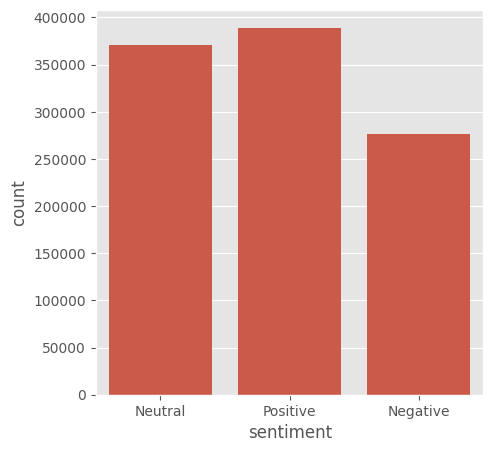

In [38]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

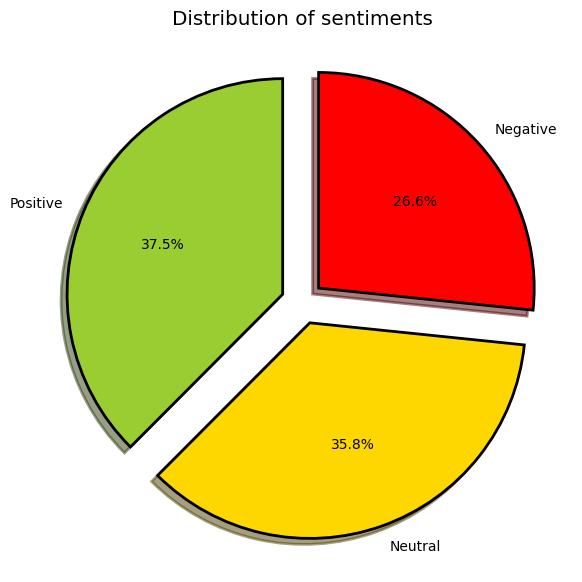

In [39]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [40]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,target,id,date,flaf,user,texts,text,polarity,sentiment
805768,4,1468712924,Tue Apr 07 03:19:05 PDT 2009,NO_QUERY,jessdropdead,GOING OUT TO DINNER WITH MY BEST FRIEND why w...,going dinner best friend wont myspace work,1.0,Positive
902064,4,1694349576,Mon May 04 02:13:13 PDT 2009,NO_QUERY,kaoriy,My best friend is coming!excited,best friend comingexcited,1.0,Positive
996873,4,1835973305,Mon May 18 07:07:27 PDT 2009,NO_QUERY,pbandjcreations,@priddycreations you are so welcome girl! Anyt...,priddycreations welcome girl anytime,1.0,Positive
234802,0,1979660030,Sun May 31 03:59:33 PDT 2009,NO_QUERY,nezz89,Had an awesome day today! But I can't freakin ...,awesome day today cant freakin go sleep boo go...,1.0,Positive
996899,4,1835974604,Mon May 18 07:07:37 PDT 2009,NO_QUERY,megmegkennedy,@stellarSuki I like that. Great way to start ...,stellarsuki like great way start monday mornin...,1.0,Positive


In [68]:
text = ' '.join([word for word in pos_tweets['texts']])

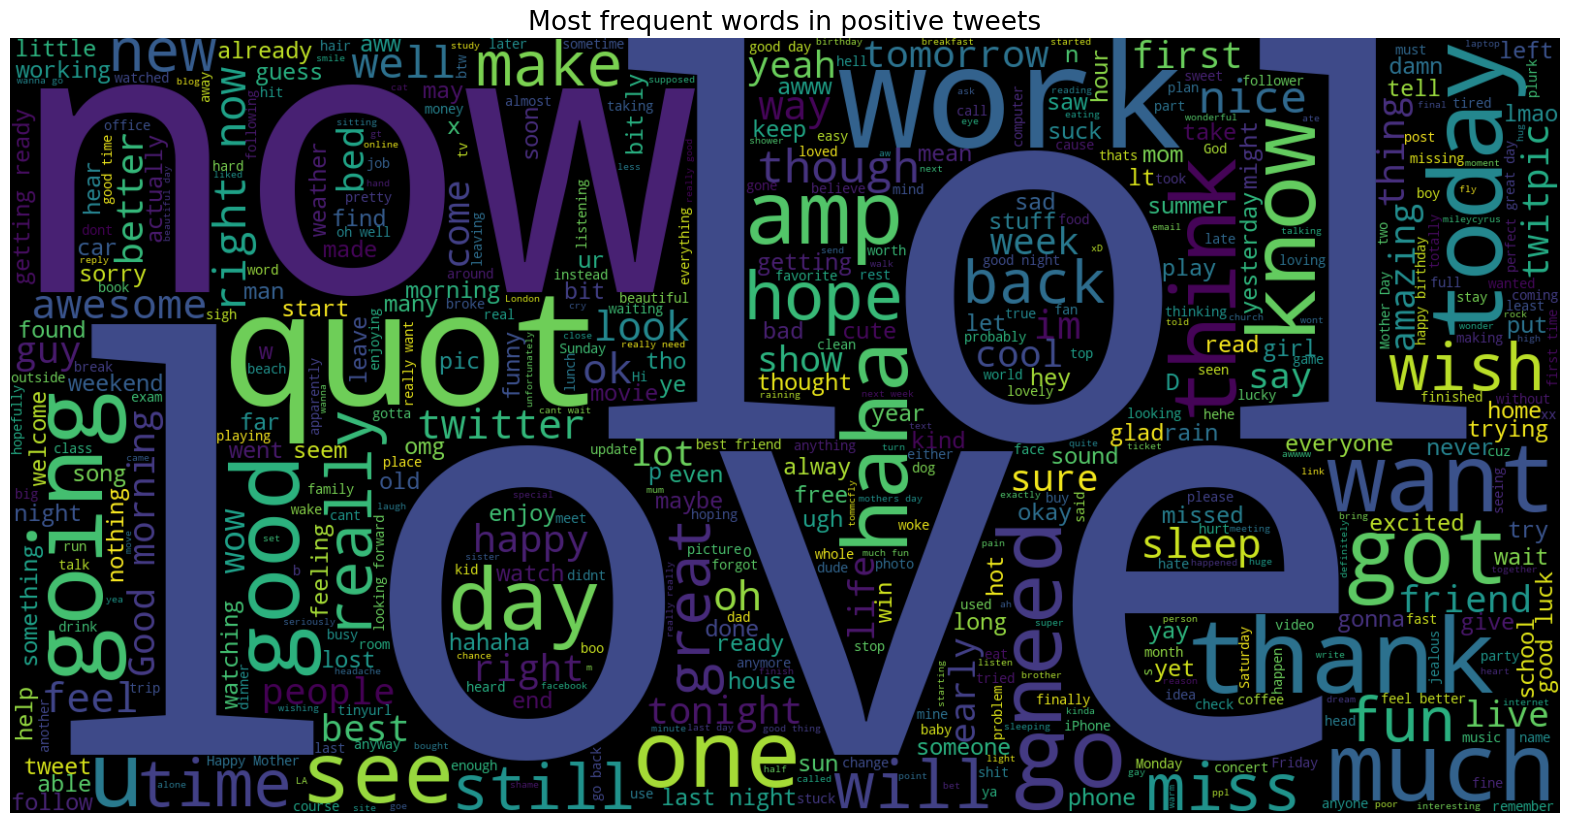

In [69]:
text = ' '.join([word for word in pos_tweets['texts']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [42]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,target,id,date,flaf,user,texts,text,polarity,sentiment
503663,0,2187912773,Mon Jun 15 21:00:03 PDT 2009,NO_QUERY,luLuisawesome,@ccjxo no shit chemistry is difficult more lik...,ccjxo shit chemistry difficult like chemistry ...,-3.965082e-18,Negative
271287,0,1989992687,Mon Jun 01 03:31:07 PDT 2009,NO_QUERY,Caraa_x,Gonna have a fag then gotta do some cleaning :...,gon na fag got ta cleaning didnt get away cutt...,-4.625929e-18,Negative
779215,0,2322874638,Wed Jun 24 23:27:02 PDT 2009,NO_QUERY,sayahpiper,"The signs /lie/. It was two lanes closed, not ...",signs lie two lanes closed three connector 210...,-4.625929e-18,Negative
49436,0,1678147474,Sat May 02 05:41:23 PDT 2009,NO_QUERY,c_lightning,Is FUCK how many more times is this gonna happ...,fuck many times gon na happen tired going bed ...,-4.625929e-18,Negative
72828,0,1694343396,Mon May 04 02:11:26 PDT 2009,NO_QUERY,marzdiva,i'm physicaly sick...i have court in a couple ...,im physicaly sicki court couple hours try clea...,-4.625929e-18,Negative


In [43]:
text = ' '.join([word for word in neg_tweets['texts']])

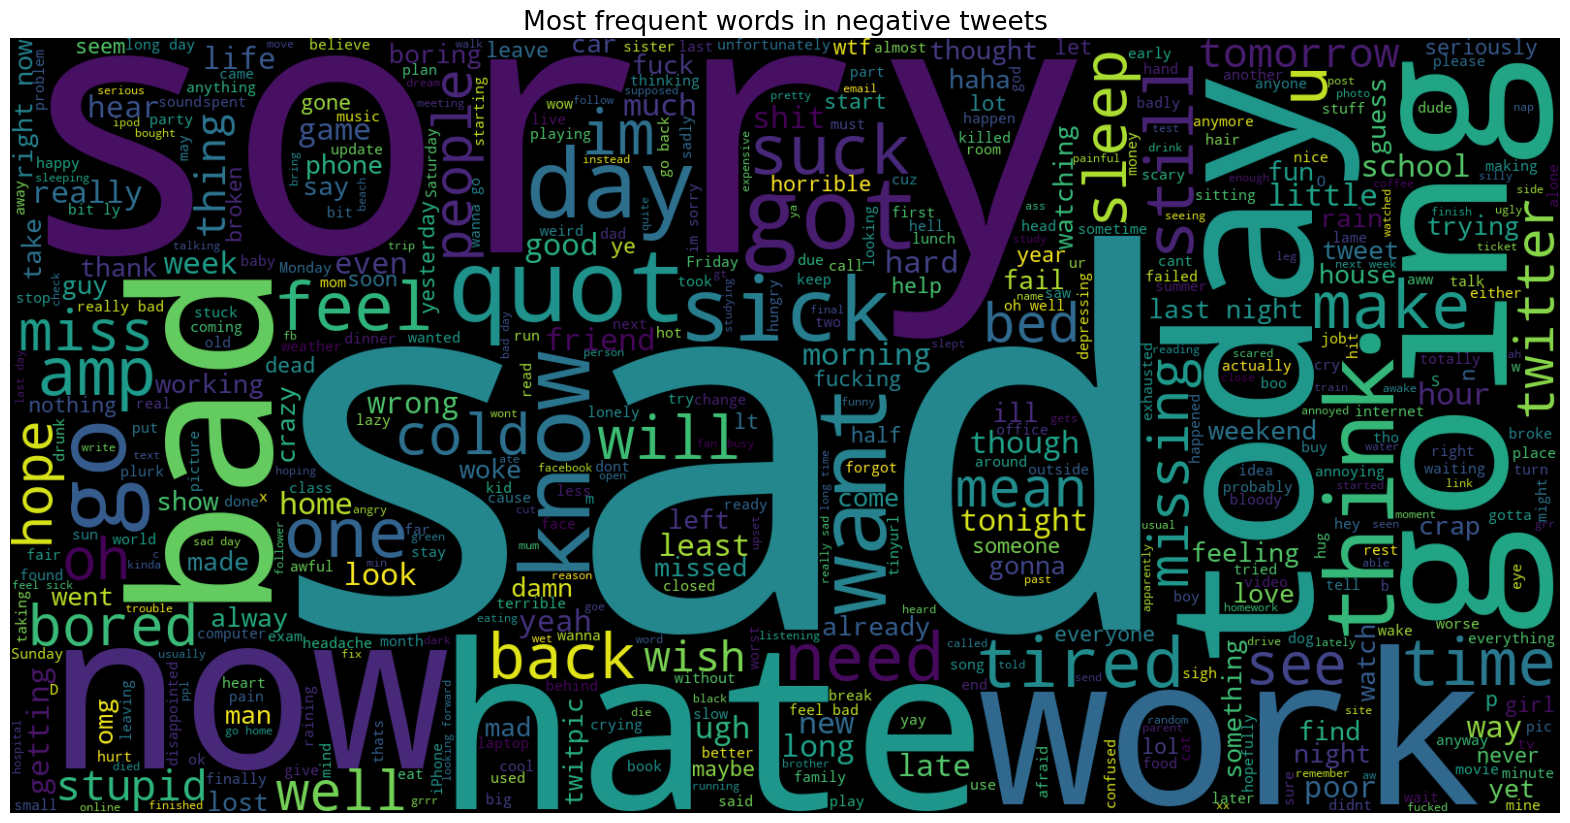

In [44]:
text = ' '.join([word for word in neg_tweets['texts']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [45]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,target,id,date,flaf,user,texts,text,polarity,sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,0.0,Neutral
683647,0,2250329575,Sat Jun 20 00:15:11 PDT 2009,NO_QUERY,jocelynmir,After a night of chomp chomp supper and rocher...,night chomp chomp supper rocher beancurd im so...,0.0,Neutral
683638,0,2250327632,Sat Jun 20 00:14:56 PDT 2009,NO_QUERY,Mickenzy,I can't seem to settle on a character... I jus...,cant seem settle character havent found one ye...,0.0,Neutral
683635,0,2250326601,Sat Jun 20 00:14:47 PDT 2009,NO_QUERY,AllisonKaminski,who falls asleep during breakfast at tiffany's...,falls asleep breakfast tiffanys,0.0,Neutral
683632,0,2250325175,Sat Jun 20 00:14:33 PDT 2009,NO_QUERY,emiliey,@brendyn WHAT?! Snickers is cheatin on me,brendyn snickers cheatin,0.0,Neutral


In [46]:
text = ' '.join([word for word in neutral_tweets['texts']])

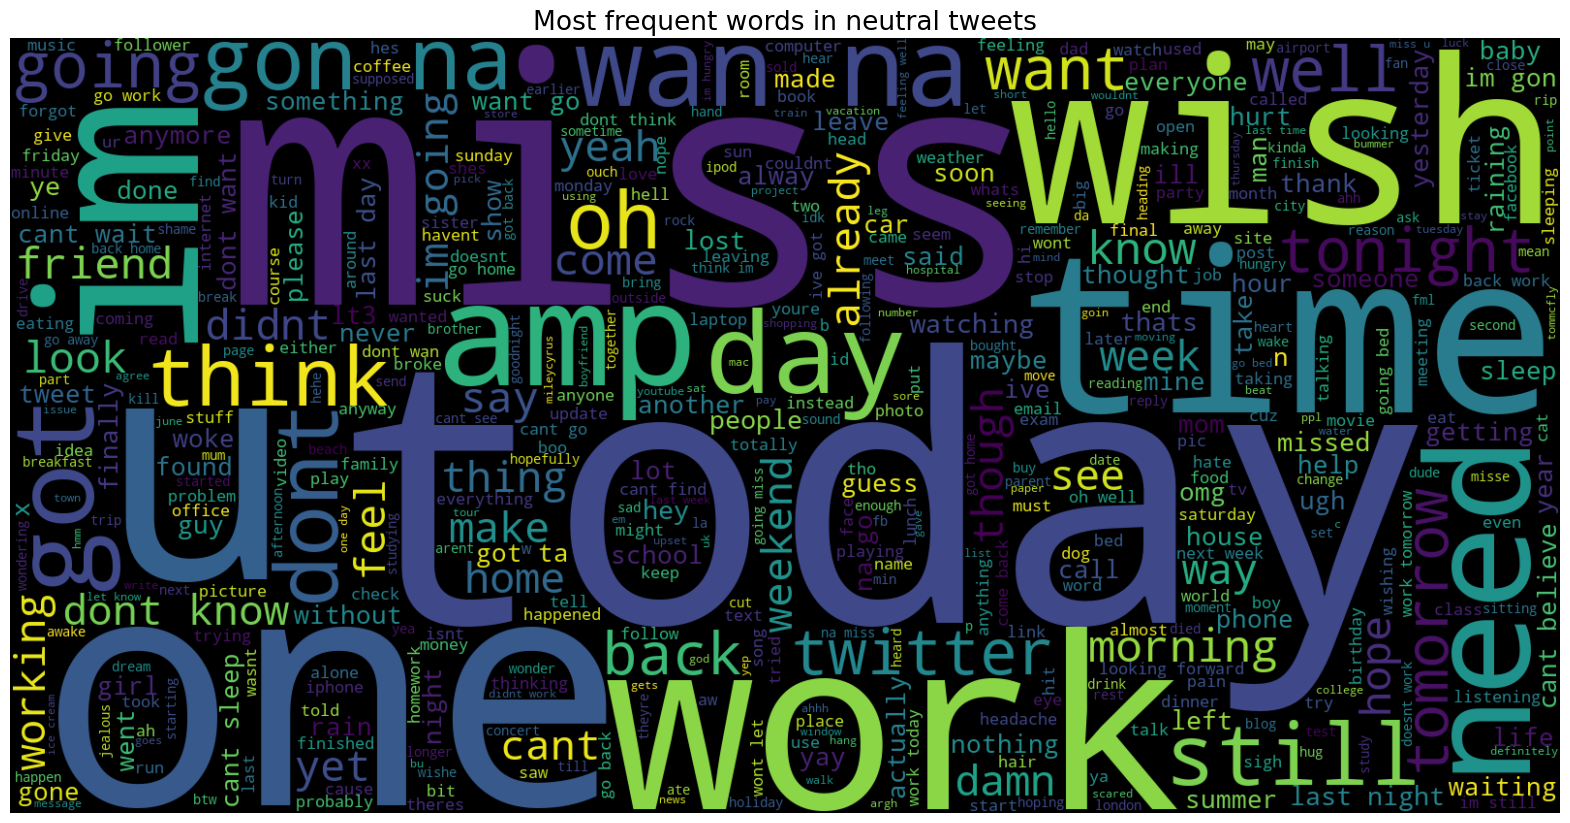

In [47]:



text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [4]:
from textblob import TextBlob
import random
import pandas as pd



In [5]:
def analyze_sentiment(comment):
    analysis = TextBlob(comment)

    if analysis.sentiment.polarity > 0:
        sentiment = 'Positive'
        category = random.choice(['happy', 'interaction', 'personal status', 'sentiment', 'weather', 'general'])
    elif analysis.sentiment.polarity < 0:
        sentiment = 'Negative'
        category = random.choice(['sad', 'unhappy', 'depressed', 'dislike', 'discomfort', 'frustration', 'support/desire comfort', 'disappointment'])
    elif analysis.sentiment.polarity == 0:
        sentiment = 'Neutral'
        category = random.choice(['sports', 'casual', 'personal update', 'expressing indifference'])
    else:
        sentiment = 'Other'
        category = []

    return sentiment, category, analysis.sentiment.polarity



In [6]:
comments_df = pd.read_csv("tweets.csv", encoding='ISO-8859-1')

In [8]:
for comment in comments_df['texts'][:10]:  
    sentiment, category, score = analyze_sentiment(comment)
    print(f"Comment: '{comment}' - Sentiment: {sentiment} - Category: {category} - Score: {score}")


Comment: 'is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!' - Sentiment: Neutral - Category: casual - Score: 0.0
Comment: '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds' - Sentiment: Positive - Category: personal status - Score: 0.5
Comment: 'my whole body feels itchy and like its on fire ' - Sentiment: Positive - Category: general - Score: 0.2
Comment: '@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ' - Sentiment: Negative - Category: disappointment - Score: -0.625
Comment: '@Kwesidei not the whole crew ' - Sentiment: Positive - Category: interaction - Score: 0.2
Comment: 'Need a hug ' - Sentiment: Neutral - Category: expressing indifference - Score: 0.0
Comment: '@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?' - Sentiment: Positive - Category: sentiment - Score: 0